In [1]:
get_ipython().magic(u'run visualizations.ipynb')
import sys
from hits import CyDetHits, CTHHits, CDCHits
from memory_profiler import memory_usage
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


In [2]:
angle = 3.7
print  (angle - 2*(angle // np.pi)*angle) % np.pi

2.58318530718


In [12]:
def radius_at_theta(radius, diff_angle, this_theta):
    """
    Get the new radial distance of a wire as a function of :
      * The total angular displacement of the wire-hole between end plates
      * The angle displacement subtended
    
    Note the angular displacment subtended must be less than the total angular
    displacement by definition.
    """
    assert not np.any(np.abs(this_theta) > np.abs(diff_angle)),\
        "The requested angle is larger than the absoulte angular difference\n"+\
        "Abs. Diff. {} \n".format(diff_angle)+\
        "Reqs. Ang. {} \n".format(this_theta)
    return abs(radius*np.cos(diff_angle/2.)/np.cos(diff_angle/2. - this_theta))

In [13]:
def theta_at_rel_z(diff_angle, z_dist, total_z):
    """
    Get the angular displacement
    """
    return diff_angle/2. - np.arctan(np.tan(diff_angle/2.)*(1. - 2.*z_dist/total_z) )

[-1.04719755 -1.05607963 -1.06523779 -1.0746835  -1.08442874 -1.09448606
 -1.10486856 -1.1155899  -1.12666437 -1.13810685 -1.14993284 -1.16215847
 -1.1748005  -1.18787633 -1.20140395 -1.21540197 -1.2298896  -1.24488655
 -1.26041306 -1.27648978 -1.29313773 -1.31037816 -1.32823245 -1.34672199
 -1.36586795 -1.38569112 -1.40621164 -1.42744876 -1.44942049 -1.47214329
 -1.49563164 -1.51989766 -1.54495058 -1.57079633 -1.59743696 -1.62487015
 -1.65308867 -1.68207987 -1.71182522 -1.74229988 -1.77347236 -1.80530432
 -1.83775045 -1.87075848 -1.9042695  -1.93821823 -1.97253369 -2.0071399
 -2.04195683 -2.07690142 -2.11188878 -2.14683337 -2.1816503  -2.21625651
 -2.25057197 -2.28452071 -2.31803172 -2.35103976 -2.38348588 -2.41531784
 -2.44649032 -2.47696498 -2.50671033 -2.53570153 -2.56392006 -2.59135325
 -2.61799388 -2.64383963 -2.66889255 -2.69315856 -2.71664691 -2.73936971
 -2.76134145 -2.78257856 -2.80309909 -2.82292225 -2.84206821 -2.86055775
 -2.87841205 -2.89565247 -2.91230042 -2.92837714 -2.

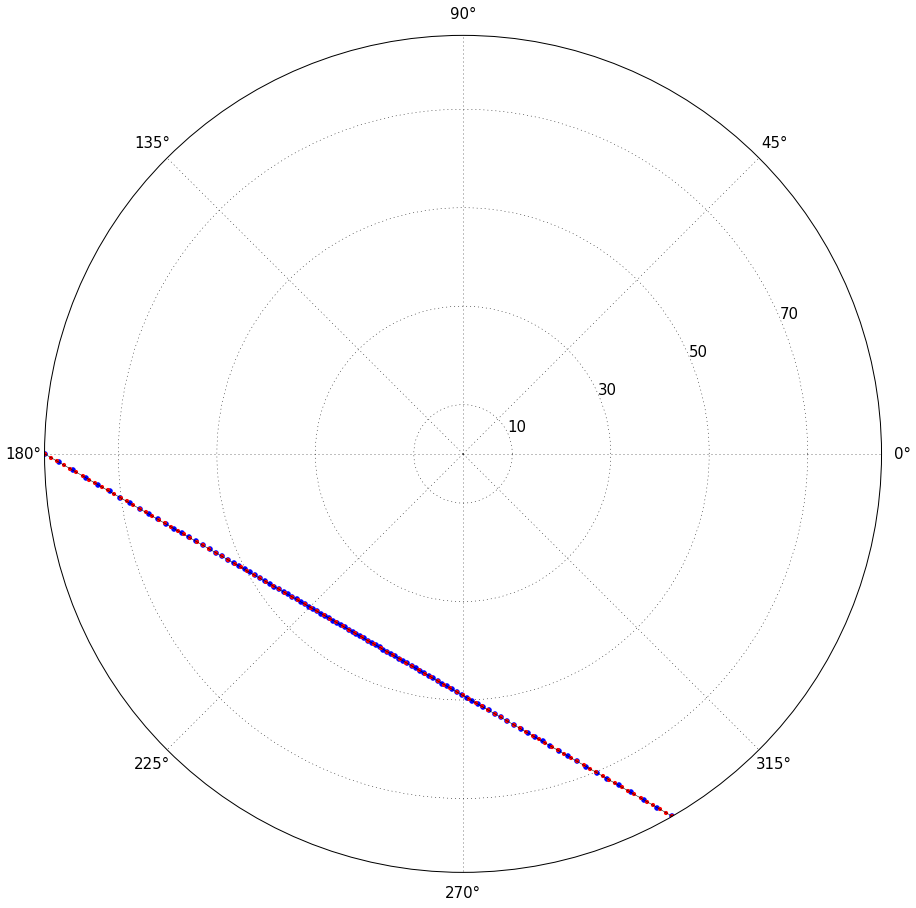

In [14]:
fig, ax = plot_setup_for_detector()

this_radius = 85
phi_1 = -np.pi/3.
this_stereo_a = -np.pi * (2./3.)
this_beta = this_stereo_a/2.

this_theta = np.linspace(0, this_stereo_a, num=100)
this_r_theta = radius_theta(this_radius, this_stereo_a, this_theta)  
this_theta += phi_1
#this_theta = this_theta % 2.*np.pi

this_x = this_r_theta * np.cos(this_theta)
this_y = this_r_theta * np.sin(this_theta)
this_z = (this_x - np.amin(this_x)) 
this_z = np.linspace(0, np.amax(this_z), 100)
this_theta_z = theta_z(this_stereo_a, this_z, np.amax(this_z))
this_r_theta_2 = radius_theta(this_radius, this_stereo_a, this_theta_z)
this_theta_z += phi_1
print this_theta_z

a1 = phi_1
a2 = phi_1 + this_stereo_a

print a1
print this_theta[0]
print this_r_theta

r1 = this_radius
r2 = this_radius

plot([a1, a2], [r1, r2], color='k', linestyle='-', linewidth=0.5)

scatter(this_theta, this_r_theta, color='blue')
scatter(this_theta_z, this_r_theta_2, color='red', s=10)
plt.show()

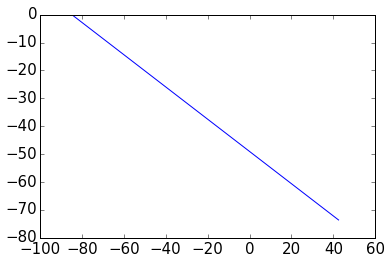

In [15]:
this_x = this_r_theta * np.cos(this_theta)
this_y = this_r_theta * np.sin(this_theta)
this_z = (this_x - np.amin(this_x)) 

plt.plot(this_x, this_y)

In [16]:
import cylinder
reload(cylinder)

<module 'cylinder' from '../modules/cylinder.pyc'>

In [17]:
from cylinder import CyDet, CylindricalArray

this_cydet = CyDet()
plot_set_cydet(this_cydet)

In [18]:
delta_angle = np.array([-0.1904, 0.1848, -0.1795, 0.1745, -0.1698, 0.1653, -0.1611, 0.1571, -0.1532, 
                         0.1496, -0.1461, 0.1428, -0.1396, 0.1366, -0.1560, 0.1527, -0.1496, 0.1466])


In [26]:
print "Inital Phi0:"
# these values check out
print this_cydet.phi0_by_layer

print "Initial Dphi:"
# these values check out
print this_cydet.dphi_by_layer

print "Difference Angles"
print delta_angle

dphi_from_phi0 = theta_z(delta_angle, 1.0, 1.0)
print dphi_from_phi0/this_cydet.dphi_by_layer
print dphi_from_phi0

new_radius = radius_theta(this_cydet.r_by_layer, delta_angle, dphi_from_phi0)
print this_cydet.r_by_layer
print new_radius

new_dphi = dphi_from_phi0 + this_cydet.phi0_by_layer[0:18]
print new_dphi

next_cydet = CylindricalArray(this_cydet.n_by_layer, new_radius, dphi_from_phi0)

Inital Phi0:
[0.015867, 0.0154, 0.0, 0.014544, 0.0, 0.0, 0.013426, 0.0, 0.012771, 0.0, 0.012177, 0.0, 0.011636, 0.0, 0.0, 0.0, 0.010686, 0.0]
Initial Dphi:
[ 0.03173326  0.03079993  0.02991993  0.02908882  0.02830264  0.02755783
  0.02685122  0.02617994  0.0255414   0.02493328  0.02435343  0.02379994
  0.02327106  0.02276516  0.0222808   0.02181662  0.02137138  0.02094395]
Difference Angles
[-0.1904  0.1848 -0.1795  0.1745 -0.1698  0.1653 -0.1611  0.1571 -0.1532
  0.1496 -0.1461  0.1428 -0.1396  0.1366 -0.156   0.1527 -0.1496  0.1466]
[-6.00001403  6.00001403 -5.99934558  5.99886812 -5.99944107  5.99829516
 -5.99972755  6.00077797 -5.99810417  6.00001403 -5.99915459  6.00001403
 -5.99886812  6.000396   -7.00154426  6.99925243 -7.00001637  6.9996344 ]
[-0.1904  0.1848 -0.1795  0.1745 -0.1698  0.1653 -0.1611  0.1571 -0.1532
  0.1496 -0.1461  0.1428 -0.1396  0.1366 -0.156   0.1527 -0.1496  0.1466]
[53.0, 54.6, 56.2, 57.8, 59.4, 61.0, 62.6, 64.2, 65.8, 67.4, 69.0, 70.6, 72.2, 73.8, 75.4, 7

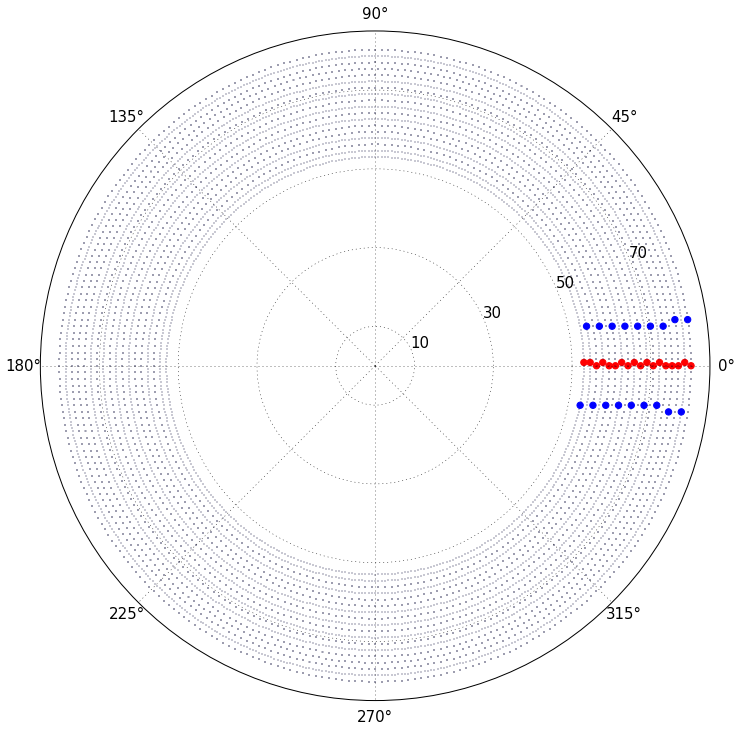

In [34]:
first_wires = np.zeros(this_cydet.n_points)
first_wires[this_cydet.first_point] = 1
n_layers = len(first_wires)

plot_output(first_wires, this_cydet, sig_color="red")
plot_output(first_wires, next_cydet)

new_dphi = np.zeros(n_layers)
new_radius = np.zeros(n_layers)
